# Principal Compoenent Analysis (PCA) with Weather Data

## This Script Contains the Following:
1. Importing Libraries and Files
2. All Stations in 2010
3. All Stations in 2013
4. All Stations in 2018

## 01. Importing Libraries and Files

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [41]:
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Machine Learning Specialization/Achievement 1/02 Data Sets'

In [42]:
df_pca = pd.read_csv(os.path.join(path, 'Unsupervised','pca_reduced.csv'),parse_dates= ['DATE'])

In [43]:
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,DATE
0,6.592609,3.579805,-2.501813,3.464234,-1.493243,2.072489,0.697235,1.208703,-0.067619,-0.717167,-0.399358,1960-01-01
1,6.927035,3.750666,-2.309617,0.954381,-1.248837,0.003128,-1.686335,0.919825,0.506089,-0.350020,0.196820,1960-01-02
2,7.224329,2.623387,-2.905954,-2.194733,-2.026765,-0.384469,-0.018839,-0.106539,1.400402,-0.023242,0.038178,1960-01-03
3,7.684972,0.175528,-4.253391,-1.526584,-1.039687,1.067518,-1.483792,-0.723350,-0.010292,0.130908,-1.230757,1960-01-04
4,7.430865,0.408172,-3.526691,-0.288855,0.498535,2.020001,0.402310,1.527624,-2.852324,-1.523035,-0.812704,1960-01-05


In [84]:
# Loading Weather Predictions file for whether a given day was pleasant or unpleasant
ans= pd.read_csv(os.path.join(path,'Unsupervised','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'),index_col=False)

In [85]:
# Converting the DATE column to datetime type for ans dataframe
ans['DATE'] = pd.to_datetime(ans['DATE'], format = '%Y%m%d')

In [44]:
pd.set_option('display.max_columns',None)

## 02. All Stations in Year 2010

In [45]:
df1 = df_pca[df_pca['DATE'].dt.year ==2010]

In [54]:
df1.head(3)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
18263,11.331210,4.286244,5.767574,-0.797720,-1.104458,-1.462565,1.024108,-0.662030,-3.150557,-0.962191,0.422627
18264,13.213137,-0.390161,3.093583,-1.782584,0.712885,-0.988579,-0.132663,0.539848,-2.869752,-0.782125,-0.110371
18265,13.841227,-4.006417,1.851388,1.355146,1.823617,-2.474476,-0.176091,-0.302728,-2.859415,-0.740473,1.917930


In [47]:
df1 = df1.drop(columns = 'DATE')

#### 'single' Method

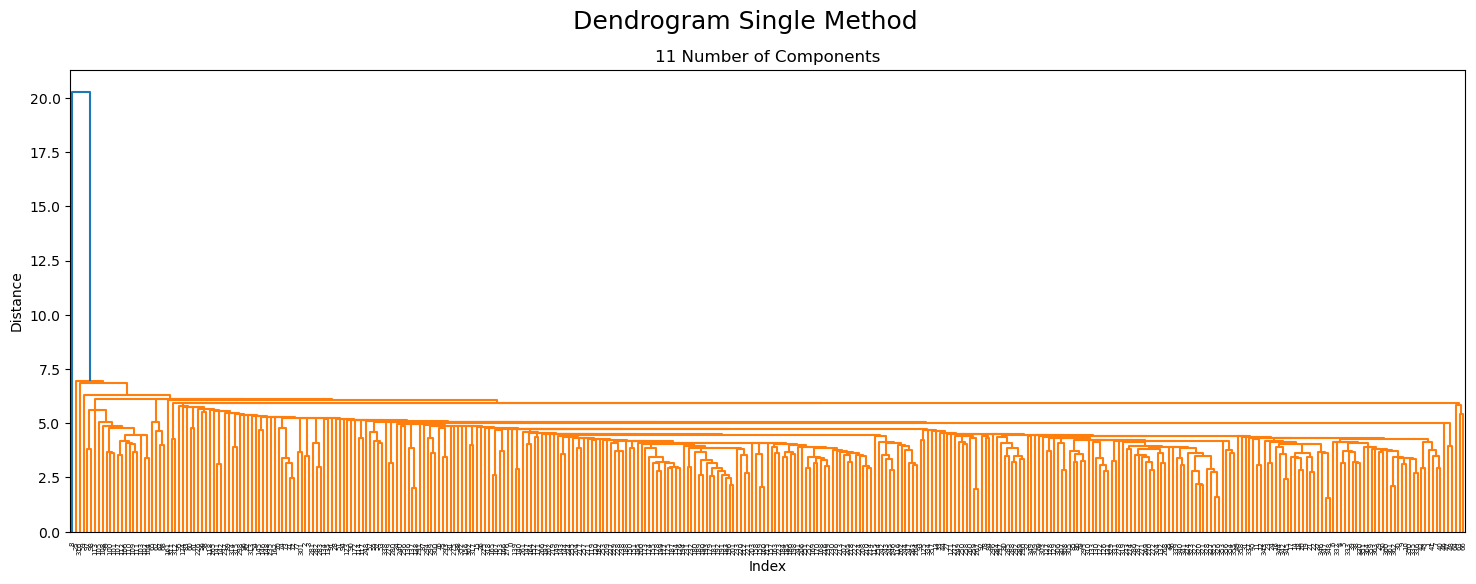

In [51]:
# Clusters and Dendograms using 'single' method
dist_sin = linkage(df1,method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Number of Components')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

One big cluster is created when using the single method. This dendrogram is similar to the one created with all features without reducing any dimensions.

#### 'complete' Method

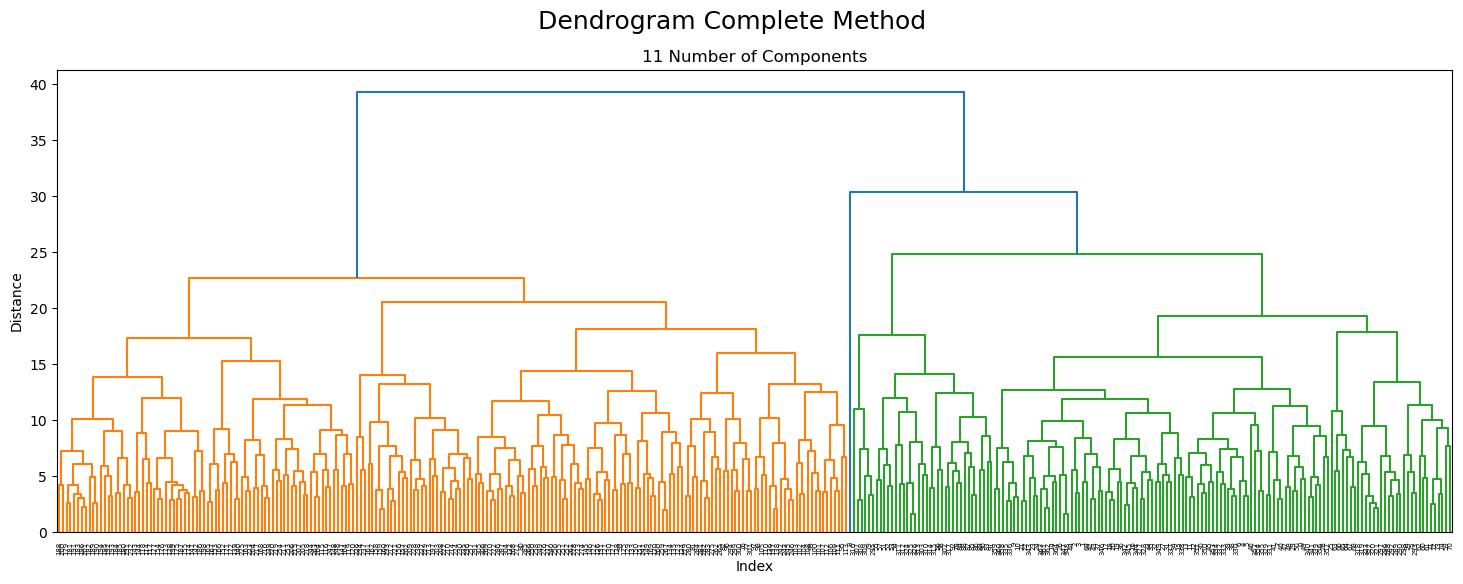

In [59]:
# Clusters and Dendograms using 'complete' method
dist_sin = linkage(df1,method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Number of Components')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

With complete method we see that there are two clear clusters created. There seems to be one outlier value. We will store these clusters to check its' distribution with regard to the pleasant weather distribution. In comparison the original data had created 4 clusters.

#### 'average' Method

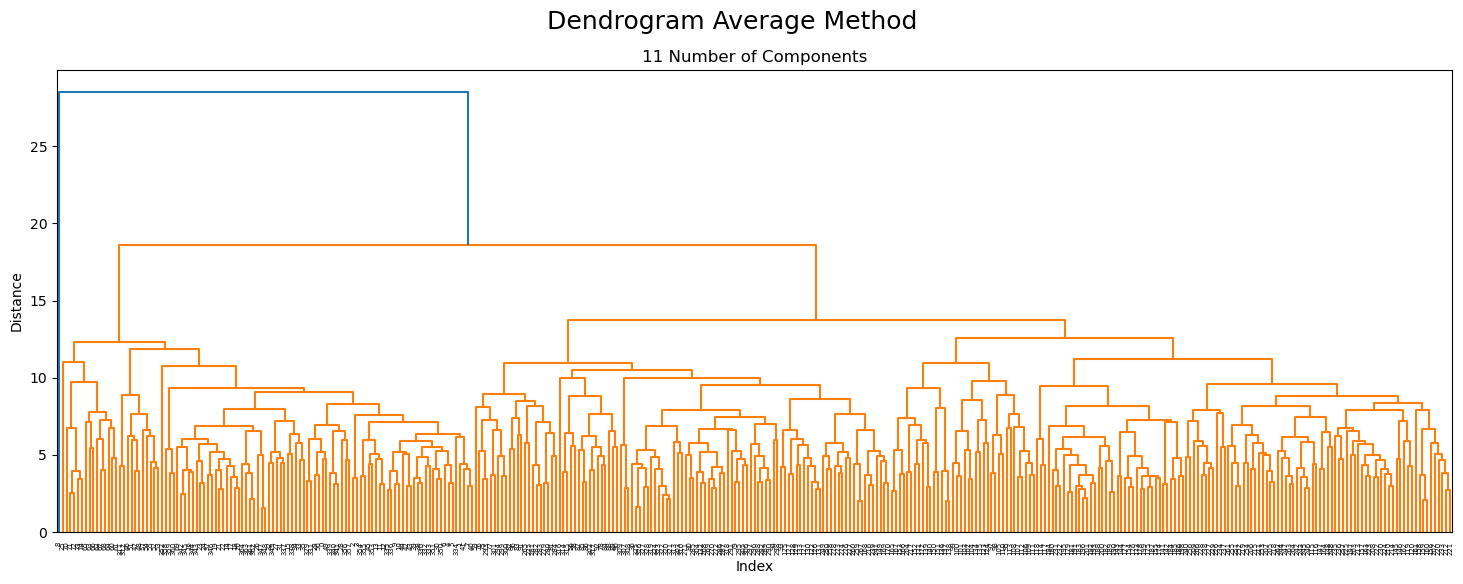

In [68]:
# Clusters and Dendograms using 'average' method
dist_sin = linkage(df1,method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Number of Components')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

Average method creates 1 big cluster. In my opinion, the outlier is affecting the formation of 2 big cluster. The distance scale is smaller than 'complete' method. 

In [63]:
df1_AM=df1.copy()
df1_AM['cluster']=fcluster(dist_sin,3, criterion='maxclust')
df1_AM.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
18263,11.331210,4.286244,5.767574,-0.797720,-1.104458,-1.462565,1.024108,-0.662030,-3.150557,-0.962191,0.422627,1
18264,13.213137,-0.390161,3.093583,-1.782584,0.712885,-0.988579,-0.132663,0.539848,-2.869752,-0.782125,-0.110371,1
18265,13.841227,-4.006417,1.851388,1.355146,1.823617,-2.474476,-0.176091,-0.302728,-2.859415,-0.740473,1.917930,1
18266,14.241157,-3.073502,2.529255,1.858735,0.637776,-3.897277,2.140008,0.242259,-3.331785,-1.241436,0.977590,1
18267,14.873828,0.644591,4.277278,0.204254,-1.120897,-2.638946,-1.137570,-0.885838,-1.797994,-1.079474,-0.207906,1


In [64]:
df1_AM['cluster'].value_counts(dropna =False)

cluster
2    256
1    108
3      1
Name: count, dtype: int64

As we have noted, there is 1 data point which seems to be away from 2 major clusters.

#### 'ward' Method

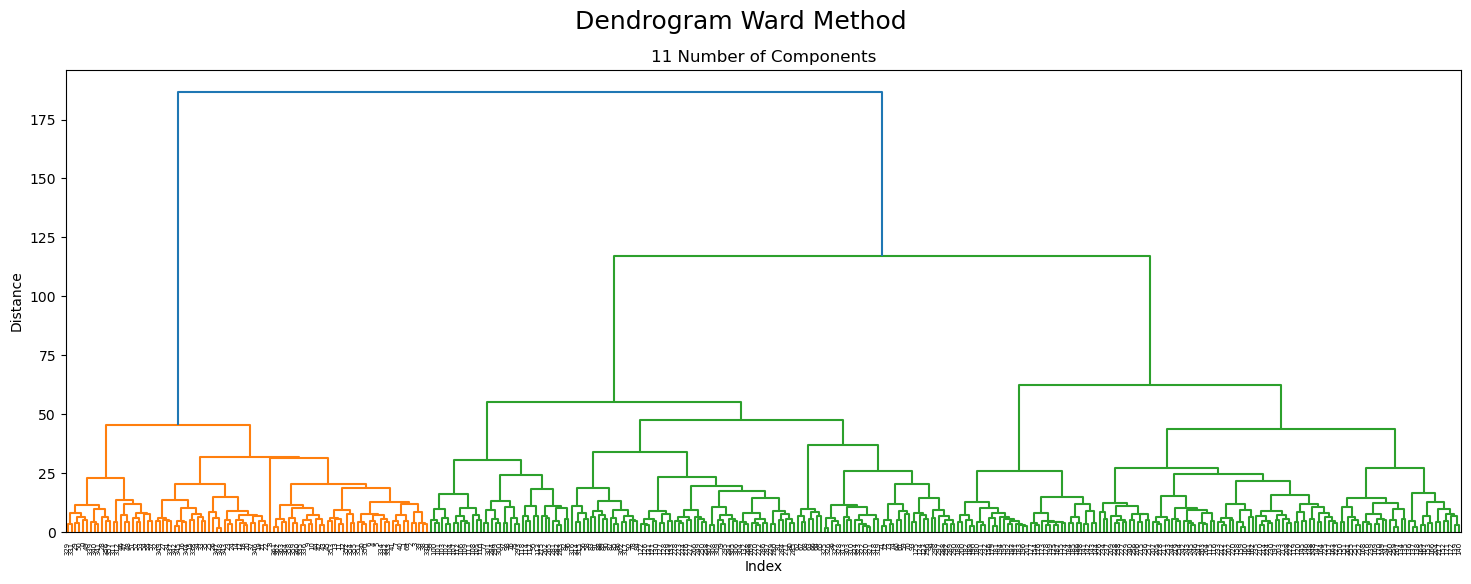

In [69]:
# Clusters and Dendograms using 'ward' method
dist_sin = linkage(df1,method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Number of Components')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

Ward method also created 2 clusters with principal components. The distance matric is much greater with ward method.

In [86]:
df1_WM=df1.copy()
df1_WM['cluster']=fcluster(dist_sin,2, criterion='maxclust')
df1_WM.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
18263,11.331210,4.286244,5.767574,-0.797720,-1.104458,-1.462565,1.024108,-0.662030,-3.150557,-0.962191,0.422627,1
18264,13.213137,-0.390161,3.093583,-1.782584,0.712885,-0.988579,-0.132663,0.539848,-2.869752,-0.782125,-0.110371,1
18265,13.841227,-4.006417,1.851388,1.355146,1.823617,-2.474476,-0.176091,-0.302728,-2.859415,-0.740473,1.917930,1
18266,14.241157,-3.073502,2.529255,1.858735,0.637776,-3.897277,2.140008,0.242259,-3.331785,-1.241436,0.977590,1
18267,14.873828,0.644591,4.277278,0.204254,-1.120897,-2.638946,-1.137570,-0.885838,-1.797994,-1.079474,-0.207906,1


In [87]:
# Checking crosstab for Dusseldorf
df1_WM['DUSSELDORF_pleasant_weather'] = 0

In [90]:
df1_WM.loc[:,'DUSSELDORF_pleasant_weather'] = ans.loc[ans['DATE'].dt.year == 2010,'DUSSELDORF_pleasant_weather']

In [91]:
pd.crosstab(df1_WM['DUSSELDORF_pleasant_weather'],df1_WM['cluster'])

cluster,1,2
DUSSELDORF_pleasant_weather,,
0,166,119
1,5,75


The original data better categorized pleasant days. With principal components, majority of the pleasant days are in cluster 2 with only 5 days in cluster 1. This is still a good result considering we reduced the dimensions to 11.

## 03. All Stations in 2013

In [66]:
df2 = df_pca[df_pca['DATE'].dt.year == 2013]

In [67]:
df2 = df2.drop(columns = 'DATE')

#### 'single' Method

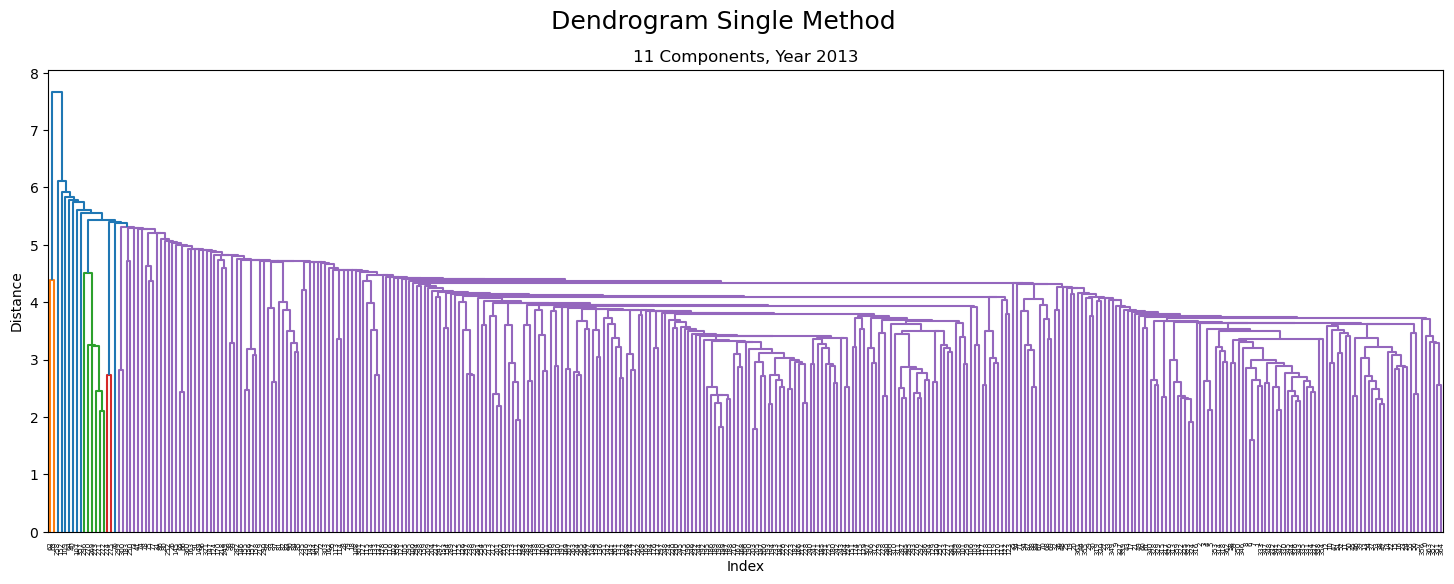

In [98]:
# Clusters and Dendograms using 'single' method
dist_sin = linkage(df2,method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Components, Year 2013')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

We see a similar pattern as before with the 'single' method. The vast majority of the data points belong to one cluster.

#### 'complete' Method

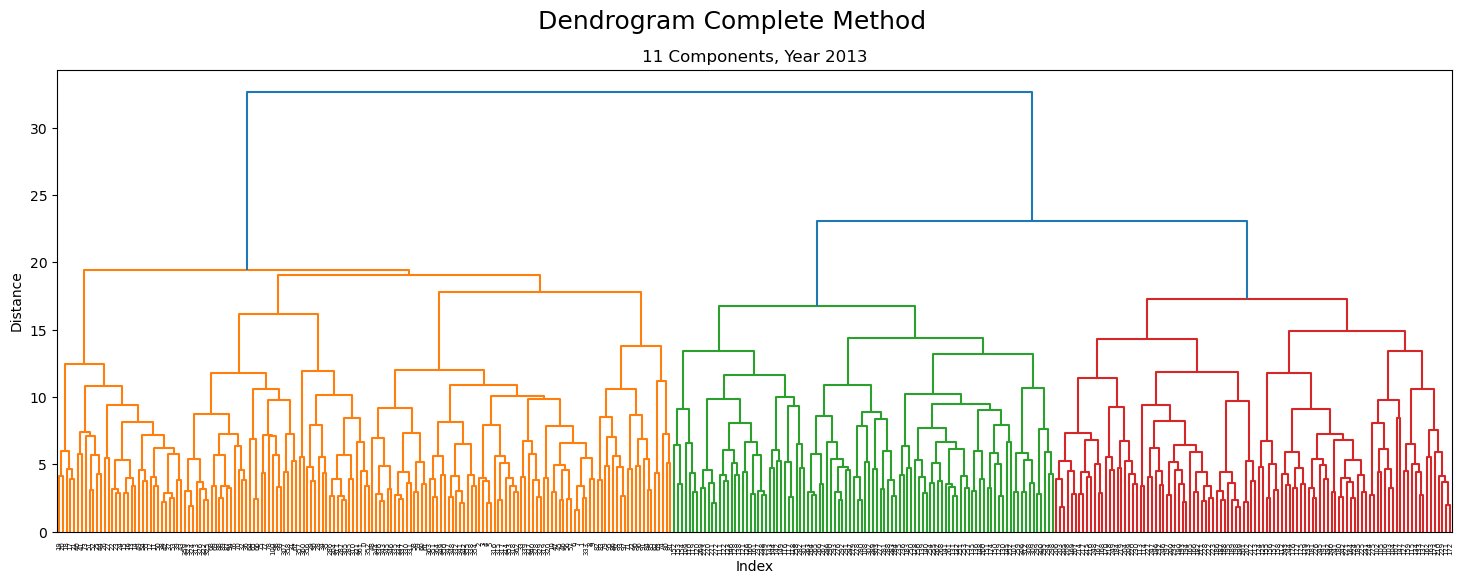

In [99]:
# Clusters and Dendograms using 'complete' method
dist_sin = linkage(df2,method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Components, Year 2013')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

With principal components, complete method has created 3 major clusters. This is close to the 4 clusters with original data.

In [74]:
df2_CM=df2.copy()
df2_CM['cluster']=fcluster(dist_sin,3, criterion='maxclust')
df2_CM.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
19359,7.589040,2.087107,-1.788130,2.256590,-0.319265,0.821589,0.658040,2.069249,-0.366646,-0.815892,1.564197,1
19360,8.140505,-0.854585,-3.670443,-1.086871,-0.828843,0.304966,0.700948,0.584013,-0.062474,-0.046314,-0.474541,1
19361,7.189186,-0.869160,-7.234819,-1.820640,1.452915,1.265221,1.415216,0.994981,0.495882,0.139470,-0.553359,1
19362,5.858132,-0.319687,-6.763581,-5.182097,0.854500,0.899089,1.527570,1.200084,1.417130,0.086269,-0.940876,1
19363,6.443648,-0.919337,-5.886021,-4.300378,1.069701,-0.342923,0.611822,0.237159,0.448786,0.498427,-1.316161,1


In [75]:
df2_CM['cluster'].value_counts(dropna = False)

cluster
1    161
3    104
2    100
Name: count, dtype: int64

#### 'average' Method

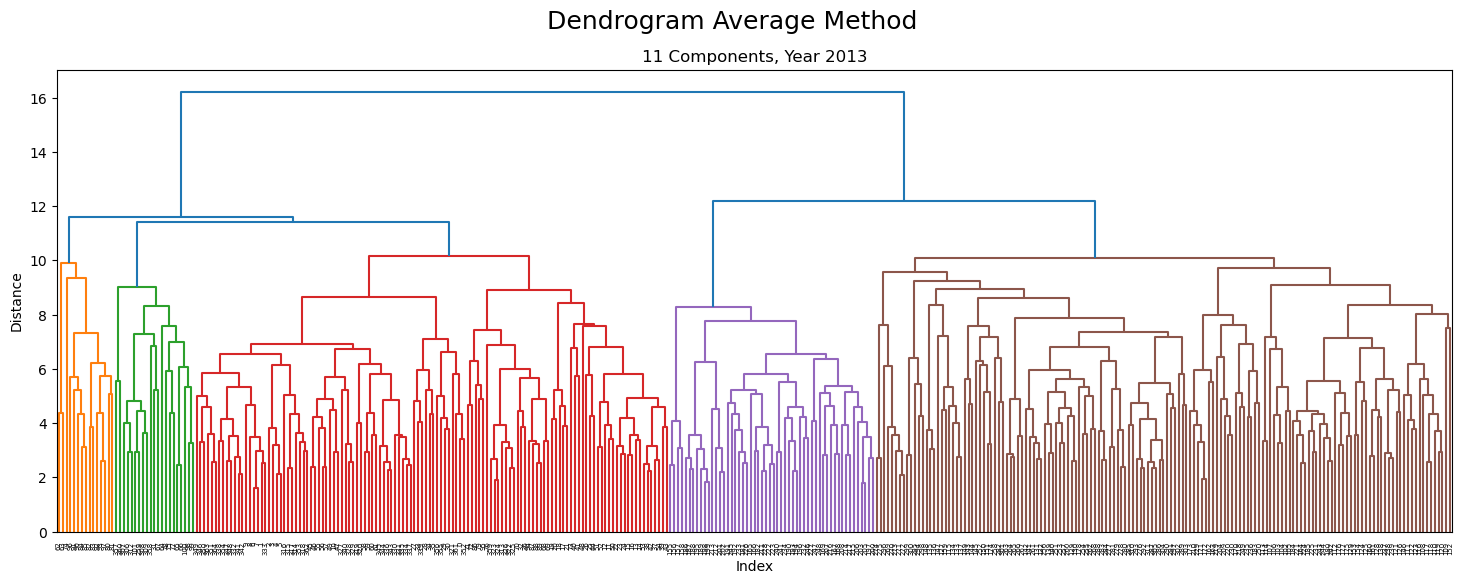

In [100]:
# Clusters and Dendograms using 'average' method
dist_sin = linkage(df2,method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Components, Year 2013')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

With principal components, average method has created 2 major clusters and 3 small clusters. With original data, the size of the 2 major components was bigger, and the smaller components had smaller size.

#### 'ward' method

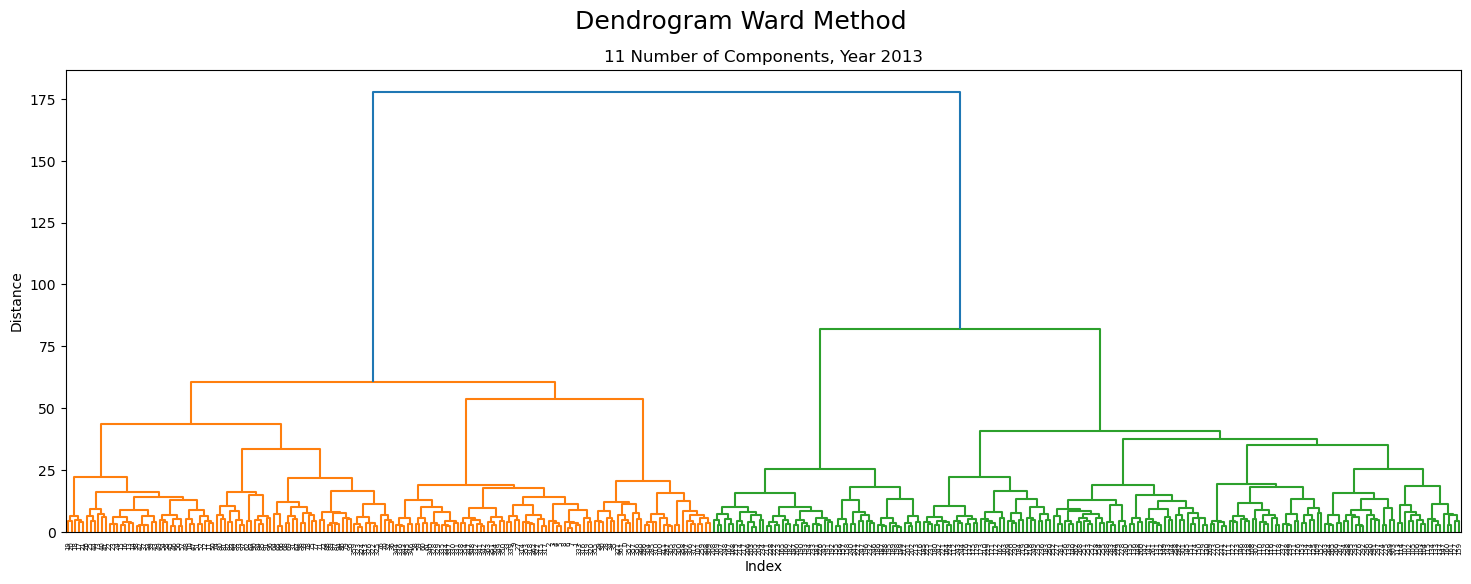

In [92]:
# Clusters and Dendograms using 'ward' method
dist_sin = linkage(df2,method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Number of Components, Year 2013')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

With ward method we have 2 clusters as we can see from the dendrogram. The distance scale is larger when compared to other methods. It closely resembles the clusters created with original data.

In [93]:
df2_WM=df2.copy()
df2_WM['cluster']=fcluster(dist_sin,2, criterion='maxclust')

In [94]:
# Creating columns and intializing columns to 0
df2_WM[['HEATHROW_pleasant_weather','MUNCHENB_pleasant_weather']] = 0

In [95]:
# assing columns from ans to df2_WM
df2_WM.loc[:, ['HEATHROW_pleasant_weather','MUNCHENB_pleasant_weather']] = ans.loc[ans['DATE'].dt.year == 2013,
                                                                                    ['HEATHROW_pleasant_weather','MUNCHENB_pleasant_weather']].values

In [96]:
print('Pleasant weather and clusters for Heathrow station:\n')
pd.crosstab(df2_WM['HEATHROW_pleasant_weather'],df2_WM['cluster'])

Pleasant weather and clusters for Heathrow station:



cluster,1,2
HEATHROW_pleasant_weather,,
0,169,119
1,0,77


In [97]:
print('Pleasant weather and clusters for Munich station:\n')
pd.crosstab(df2_WM['MUNCHENB_pleasant_weather'],df2_WM['cluster'])

Pleasant weather and clusters for Munich station:



cluster,1,2
MUNCHENB_pleasant_weather,,
0,169,112
1,0,84


11 components seems to be doing a decent job in identifying cluster for pleasant days. Cluster 1 in both the instances represents only unpleasant days.

## 04. All Stations in 2018

In [78]:
df3 = df_pca[df_pca['DATE'].dt.year == 2018]

In [79]:
df3 = df3.drop(columns = 'DATE')

#### 'single' Method

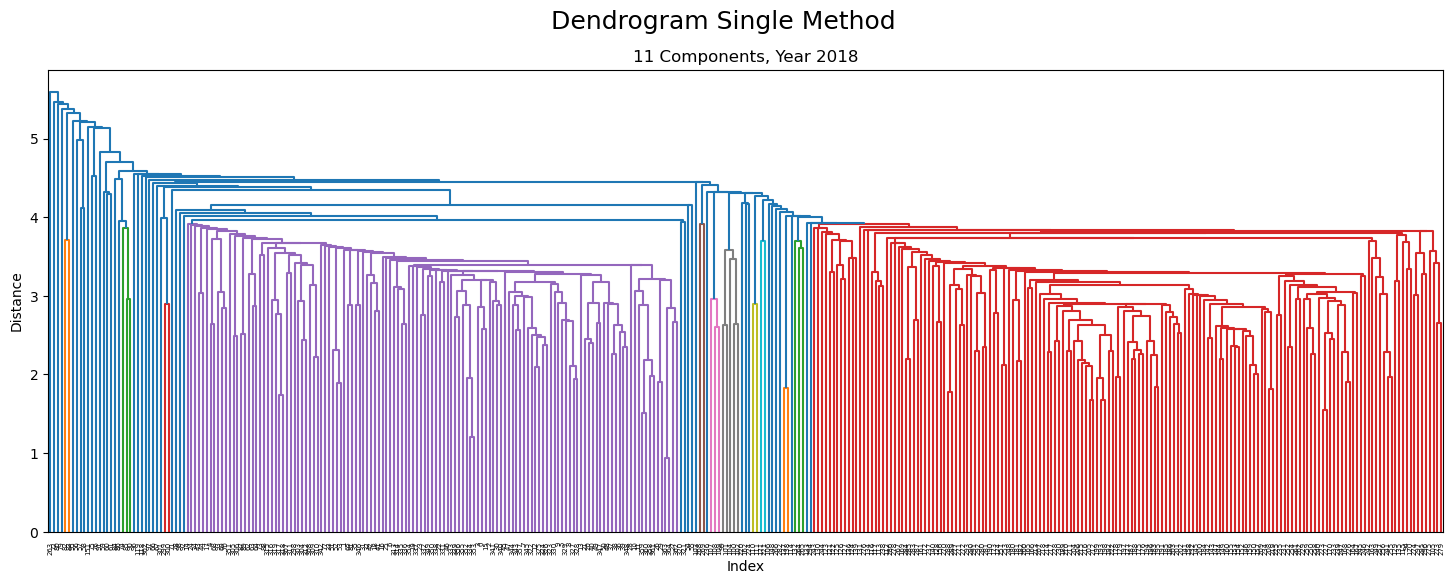

In [80]:
# Clusters and Dendograms using 'single' method
dist_sin = linkage(df3,method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Components, Year 2018')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

With 11 principal components, there are 2 major clusters generated in this case. The original data had 1 major cluster.

#### 'complete' Method

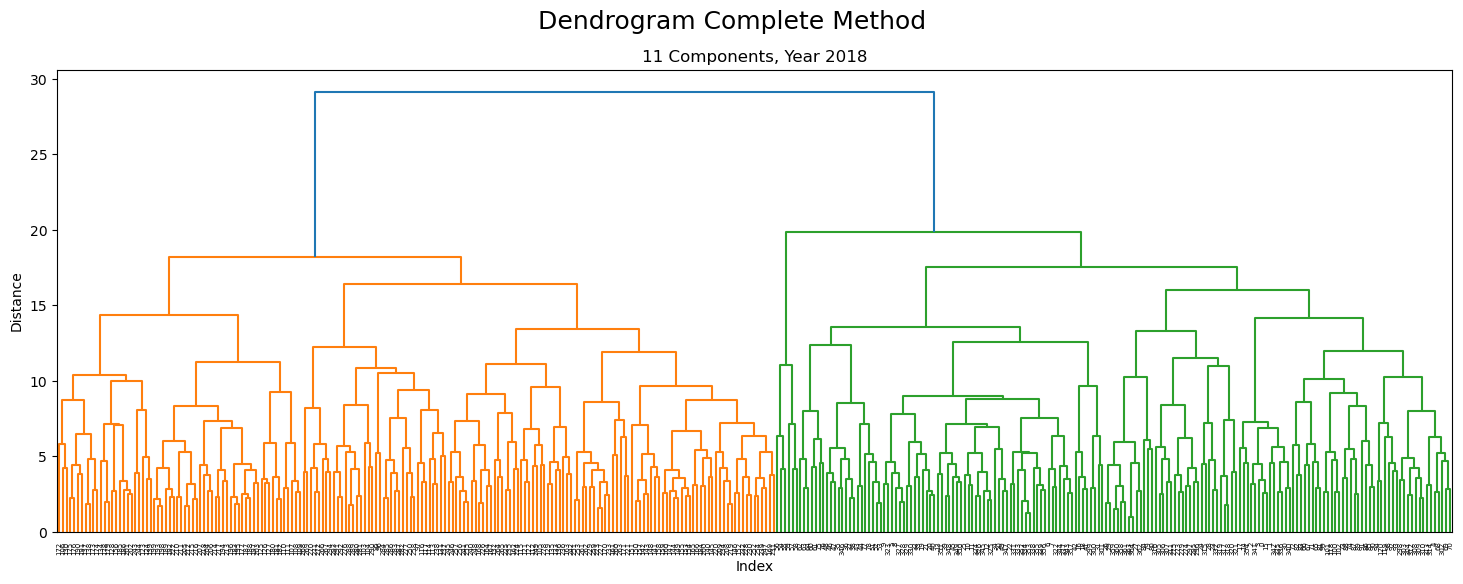

In [81]:
# Clusters and Dendograms using 'complete' method
dist_sin = linkage(df3,method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Components, Year 2018')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

There are 2 major clusters generated. The original data generated 2 major and 1 small cluster.

#### 'average' Method

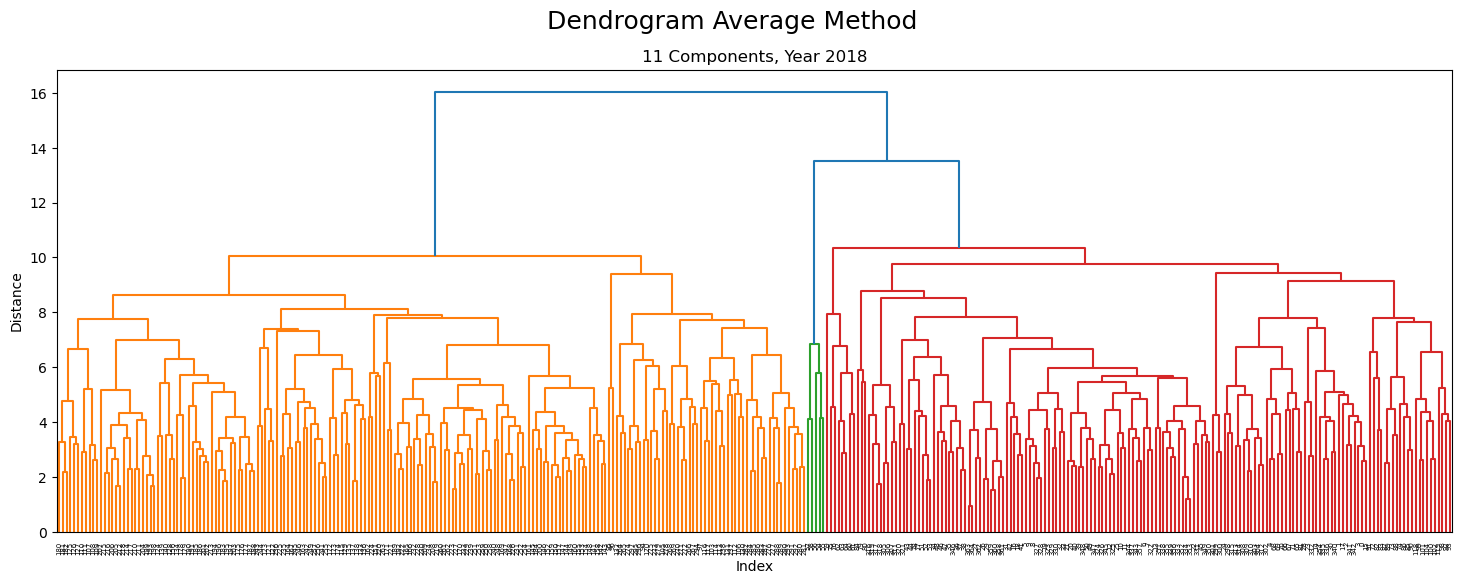

In [82]:
# Clusters and Dendograms using 'average' method
dist_sin = linkage(df3,method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Components, Year 2018')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

There are 2 major and 1 small cluster with principal components. The original data generated 1 big cluster with ourlier affecting the number of clusters.

#### 'ward' Method

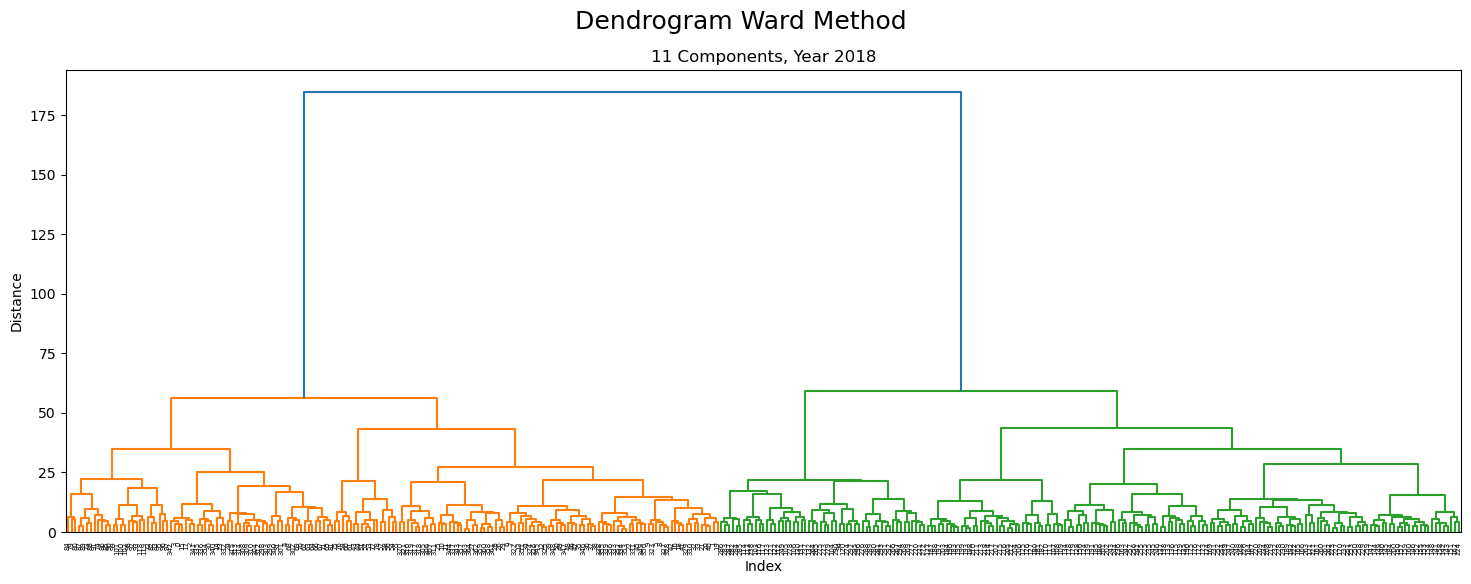

In [83]:
# Clusters and Dendograms using 'ward' method
dist_sin = linkage(df3,method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('11 Components, Year 2018')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

Ward method has generated 2 major clusters with principal components which same as number of clusters generated with original data.